In [30]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt
import community
from collections import Counter

In [31]:
tweet=pd.read_csv("C:/Users/1995m/OneDrive/Desktop/df_finale_sardine.csv")

In [24]:
tweet.columns

Index(['Unnamed: 0', 'index', '@mentions', 'account_created_at',
       'account_description', 'account_favourites_count',
       'account_followers_count', 'account_friends_count',
       'account_listed_count', 'account_location', 'account_name',
       'account_protected', 'screen_name', 'account_statuses_count',
       'account_user_id', 'account_verified', 'reply_count',
       'reply_to_screen_name', 'reply_to_status_id', 'reply_to_user_id',
       'retweet_count', 'retweet_created_at', 'retweet_description',
       'retweet_favorite_count', 'retweet_followers_count',
       'retweet_friends_count', 'retweet_location', 'retweet_name',
       'retweet_retweet_count', 'retweet_source', 'retweet_status_id',
       'retweet_statuses_count', 'retweet_user_id', 'retweet_verified', 'text',
       'tweet_created_at', 'tweet_favorite_count', 'hashtags', 'tweet_source'],
      dtype='object')

In [32]:
tweet.drop(['Unnamed: 0', 'index'], axis=1,inplace=True)

In [33]:
tweet["@mentions"]

0                          AMorelliMilano,_GrayDorian
1                                          doluccia16
2                                          angelo_ra_
3                                         _GrayDorian
4                          AMorelliMilano,_GrayDorian
5                                           LeoDeSanc
6                          AMorelliMilano,_GrayDorian
7                                        DarioBallini
8                          lItaloeuropeo,VivianaDesio
9        lauraboldrini,,PiazzapulitaLA7,alex_orlowski
10                                                NaN
11                                        ideadestra_
12                                                NaN
13                                     CaterinaAvanza
14                                                NaN
15                                                NaN
16                                                NaN
17                                                NaN
18                          

In [34]:
tweet["hashtags"]

0                                                  sardine
1                                                  Sardine
2                                                      NaN
3                                                      NaN
4                                                  sardine
5                                                      NaN
6                                                  sardine
7                           ['FridayForFuture', 'Sardine']
8              ['14Dicembre', 'Londra', 'TrafalgarSquare']
9                              ['facciamorete', 'Sardine']
10       ['sardine', '6000sardine', 'FR', 'facciamorete...
11                                               BellaCiao
12        ['sardine', 'macron', 'francia', 'piazzapulita']
13           ['mes', 'sardine', 'francia', 'piazzapulita']
14       ['Sardine', 'sinistra', 'ottoemezzo', 'piazzap...
15       ['mes', 'euro', 'nazismo', 'sardine', 'europa'...
16       ['francia', 'sardine', 'renzi', 'piazzapulita'.

In [35]:
tweet["hashtags"] = tweet["hashtags"].replace("\[","", regex = True).str.lower()
tweet["hashtags"] = tweet["hashtags"].replace("\]","", regex = True).str.lower()
tweet["hashtags"] = tweet["hashtags"].replace("\'","", regex = True).str.lower()
tweet["hashtags"] = tweet["hashtags"].replace(" ","", regex = True).str.lower()
tweet["hashtags"]=tweet["hashtags"].replace("#","",regex=True).str.lower()

In [36]:
tweet["@mentions"]=tweet["@mentions"].replace(",,",",",regex=True).str.lower()

In [37]:
df_for_hash=tweet[(tweet["hashtags"].notnull())&(tweet["hashtags"]!="Vuoto")&(tweet["hashtags"]!="")]

In [38]:
df_for_men=tweet[tweet["@mentions"].notnull()&(tweet["@mentions"]!="")]

In [39]:
df_for_hash["hashtags"] = df_for_hash["hashtags"].apply(lambda x: x.split(','))

C:\Users\1995m\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
df_for_men["@mentions"] = df_for_men["@mentions"].apply(lambda x: x.split(','))

C:\Users\1995m\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
df=df_for_men.iloc[:10,:]

In [43]:
GM = nx.DiGraph()

for r in df.iterrows():
    for user in r[1]['@mentions']:
        GM.add_edge(r[1]['screen_name'], user)

C:\Users\1995m\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\1995m\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


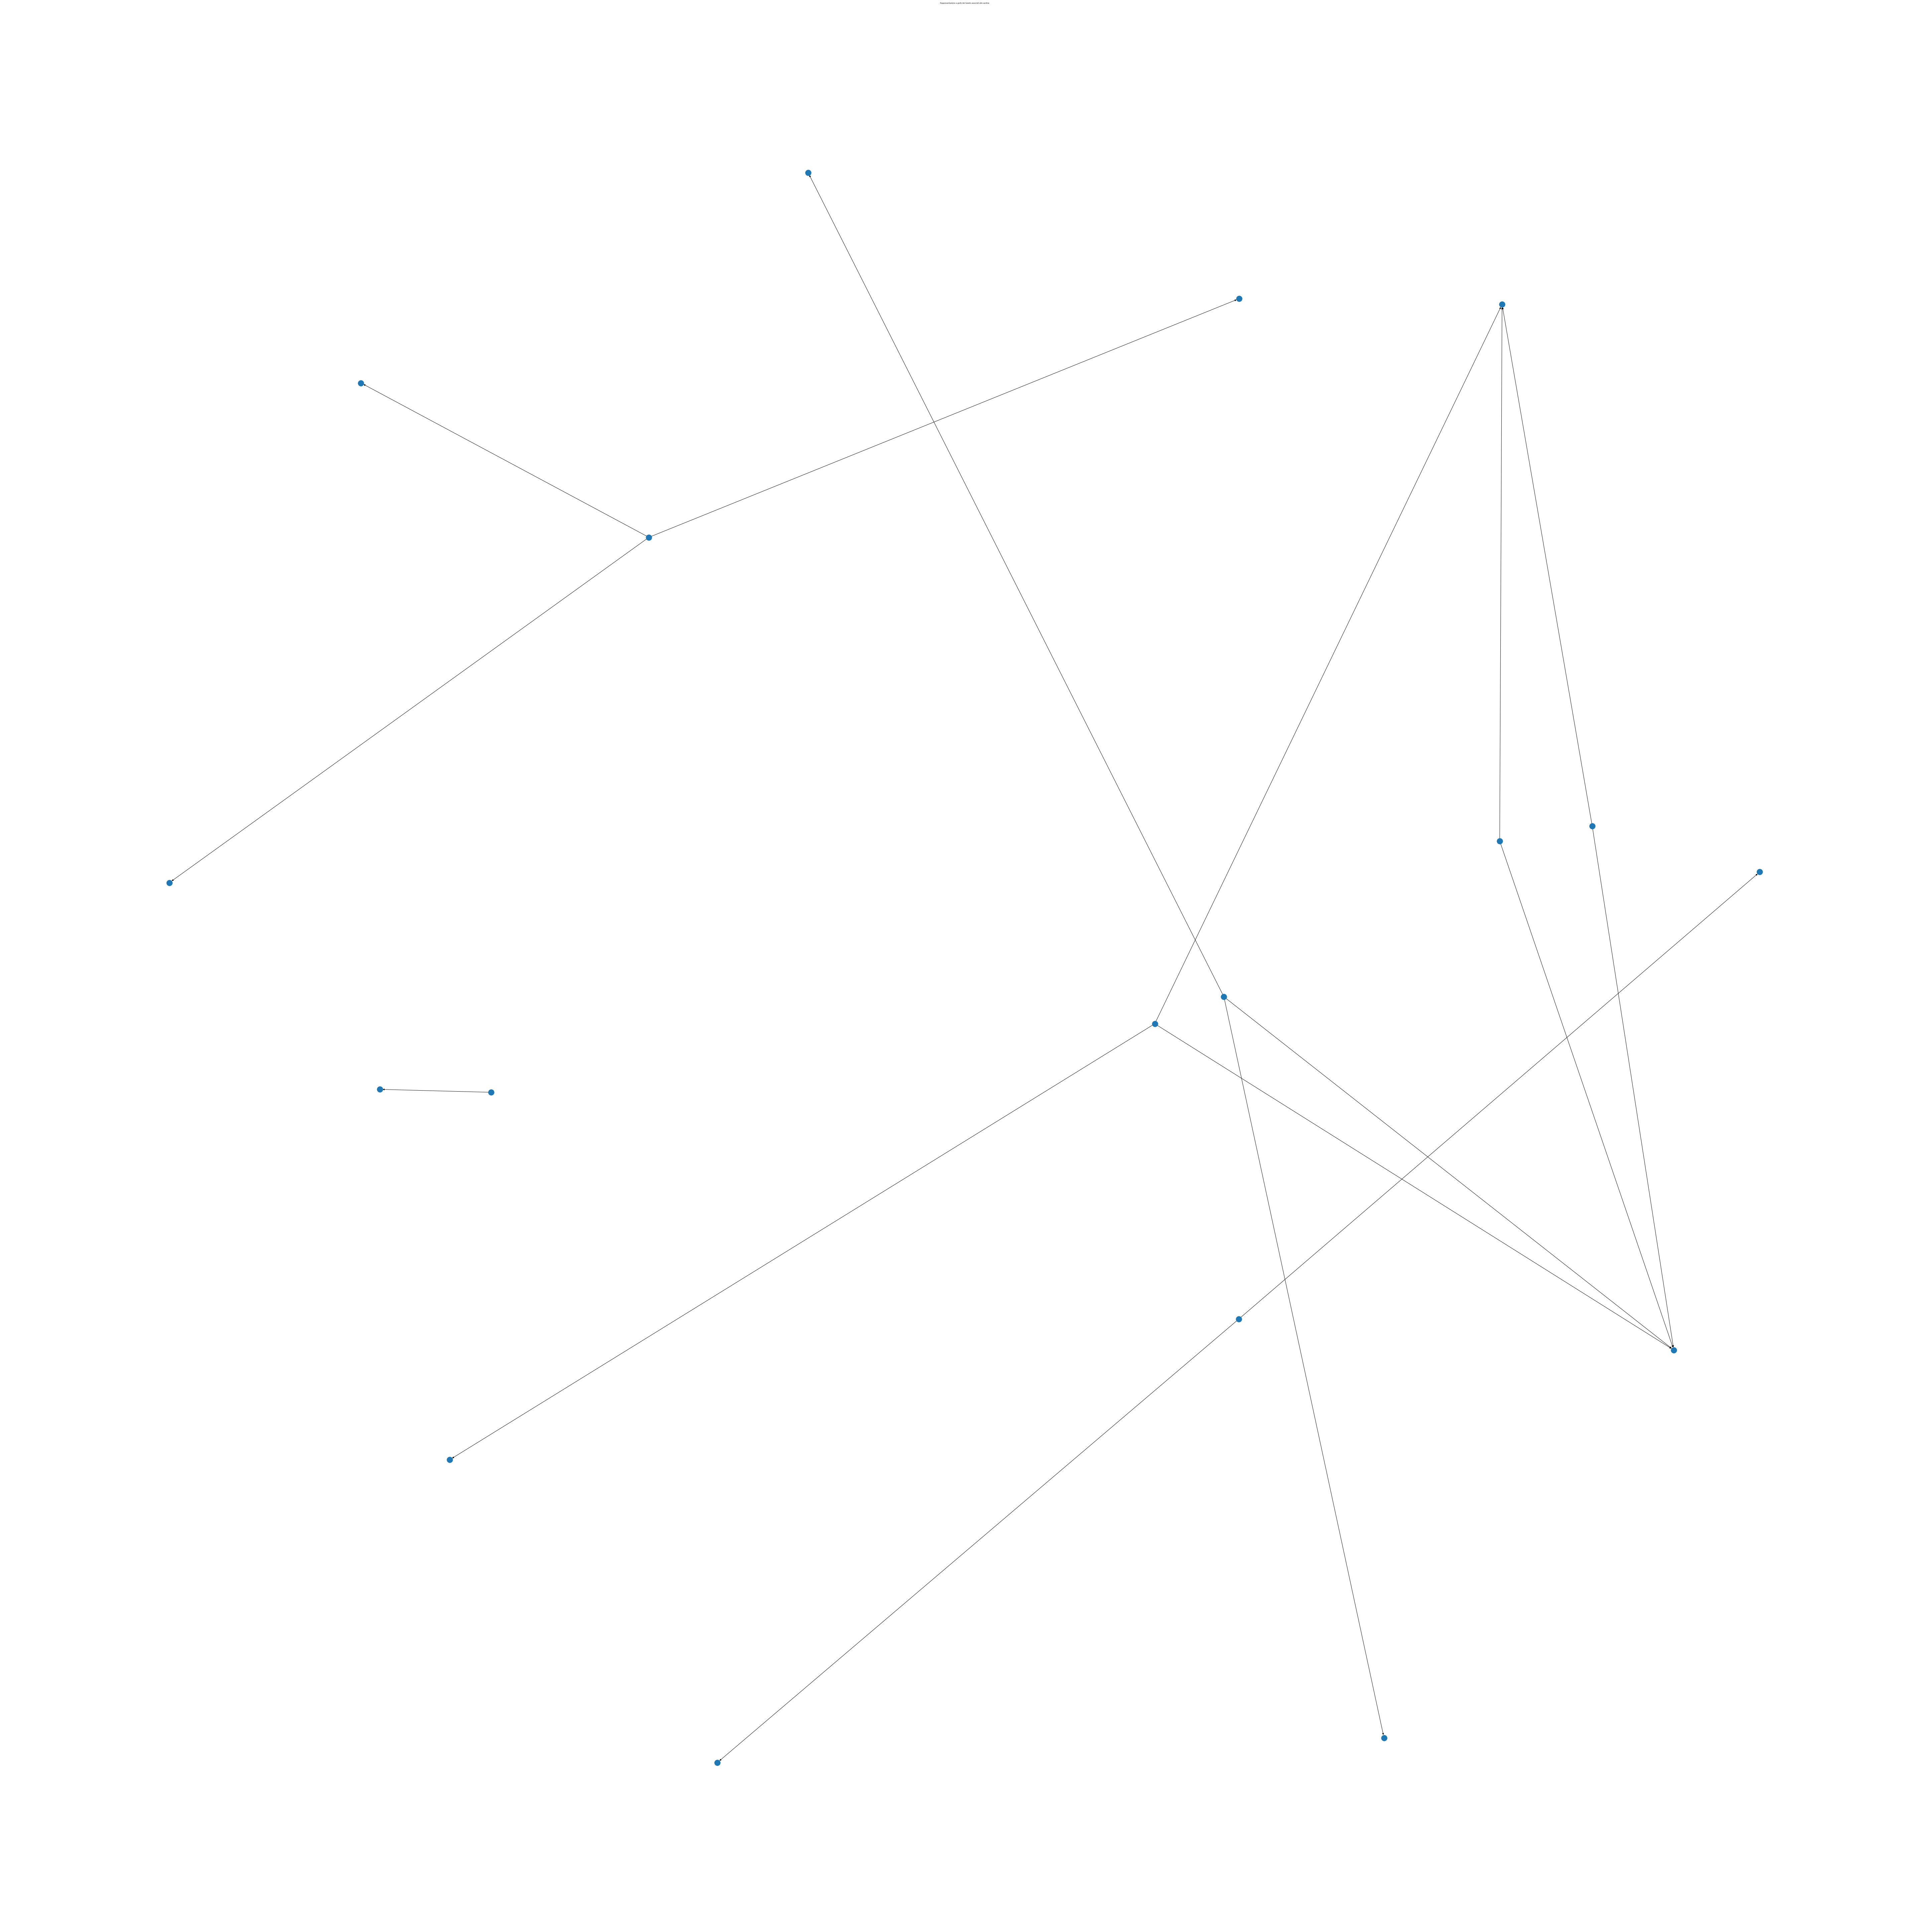

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(80, 80))
nx.draw(GM, with_labels=False)
plt.title('Rappresentazione a grafo dei tweets associati alle sardine', size=5)
plt.show()

In [45]:
GM.in_degree()

InDegreeView({'APergolott': 0, 'amorellimilano': 3, '_graydorian': 4, 'Federicobarald3': 0, 'doluccia16': 1, 'angelo_ra_': 1, 'modamanager': 0, 'eurallergico': 0, 'leodesanc': 1, 'Giova1991TS': 0, 'darioballini': 1, 'AndreaBonturi': 0, 'litaloeuropeo': 1, 'vivianadesio': 1, 'pietro_busacca': 0, 'lauraboldrini': 1, 'piazzapulitala7': 1, 'alex_orlowski': 1})

In [47]:
GM = nx.DiGraph()

for r in df_for_men.iterrows():
    for user in r[1]['@mentions']:
        GM.add_edge(r[1]['screen_name'], user)

In [48]:
GH = nx.DiGraph()
for r in df_for_hash.iterrows():
    for user in r[1]['hashtags']:
        GH.add_edge(r[1]['screen_name'], user)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(80, 80))
nx.draw(GH, with_labels=False)
plt.title('Rappresentazione a grafo dei tweets associati alle sardine', size=5)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(80, 80))
nx.draw(GM, with_labels=False)
plt.title('Rappresentazione a grafo dei tweets associati alle sardine', size=5)
plt.show()

In [18]:
gradoM = pd.DataFrame(nx.degree(GM))

In [19]:
gradoH = pd.DataFrame(nx.degree(GH))

In [20]:
gradoM.sort_values(1, ascending=False).head(10)

,0,1
24,6000sardine,826
2,_graydorian,662
93,repubblica,578
368,giorgiameloni,527
25,manuelabellipan,465
1,amorellimilano,439
1278,radiosavana,435
145,matteosalvinimi,429
13,vivianadesio,419
545,milkosichinolfi,363


In [21]:
gradoH.sort_values(1, ascending=False).head(10)

,0,1
1,sardine,8553
3402,romanonsilega,1225
176,salvini,1064
768,roma,997
12,facciamorete,882
3163,romanonabbocca,712
319,sardinecontrosalvini,664
19,bellaciao,661
14,6000sardine,645
1847,torino,574


In [22]:
partM = community.best_partition(GM)
modM = community.modularity(partM,GM)

In [23]:
partM

{'APergolott': 0,
 'amorellimilano': 0,
 '_graydorian': 0,
 'Federicobarald3': 0,
 'doluccia16': 0,
 'angelo_ra_': 0,
 'modamanager': 0,
 'eurallergico': 0,
 'leodesanc': 0,
 'Giova1991TS': 1,
 'darioballini': 1,
 'AndreaBonturi': 2,
 'litaloeuropeo': 2,
 'vivianadesio': 2,
 'pietro_busacca': 2,
 'lauraboldrini': 3,
 'piazzapulitala7': 3,
 'alex_orlowski': 2,
 '12qbert': 0,
 'ideadestra_': 4,
 'LeoDeSanc': 5,
 'caterinaavanza': 5,
 'grigio_il': 0,
 'smilypapiking': 2,
 '6000sardine': 6,
 'manuelabellipan': 2,
 'laprimamanina': 2,
 'liuk71rm': 1,
 'pdnetwork': 1,
 'MarcoSavioli5': 0,
 'albiuno': 0,
 'mtama2112': 0,
 'carlakak': 4,
 'enzopaso': 4,
 'FabioBresciaTwi': 0,
 'ministroeconom1': 0,
 'Paolo_Tamagnini': 2,
 'samuelevegna': 2,
 'enricovik': 0,
 'corroborante': 0,
 'Begbie333': 0,
 'PillaPaladini': 2,
 'NOstress100': 4,
 'dukana2': 4,
 'pippi36423094': 4,
 'fefebaraonda': 2,
 'vanabeau': 2,
 'frustametafora': 2,
 'valerio81317970': 0,
 'mat_brandi': 0,
 'WillyCoyote6': 0,
 'Lucapa

In [24]:
modM

0.5847020965770048

In [32]:
clusterM=list(partM.values())

In [33]:
partH = community.best_partition(GH)
modH = community.modularity(partH,GH)

In [34]:
clusterH=list(partH.values())

In [35]:
Counter(clusterH)

Counter({0: 1547,
         1: 2784,
         2: 1101,
         3: 535,
         4: 1922,
         5: 2092,
         6: 129,
         7: 672,
         8: 258,
         9: 231,
         10: 769,
         11: 251,
         12: 165,
         13: 164,
         14: 32,
         15: 15,
         16: 10,
         17: 54,
         18: 5,
         19: 2,
         20: 5,
         21: 5,
         22: 4,
         23: 6,
         24: 10,
         25: 2,
         26: 4,
         27: 6,
         28: 7,
         29: 6,
         30: 6,
         31: 6,
         32: 13,
         33: 4,
         34: 4,
         35: 2,
         36: 3,
         37: 2,
         38: 3,
         39: 3,
         40: 2,
         41: 3,
         42: 2,
         43: 15,
         44: 2,
         45: 2,
         46: 2,
         47: 3,
         48: 2,
         49: 7,
         50: 2,
         51: 2,
         52: 2,
         53: 2,
         54: 4,
         55: 3,
         56: 2,
         57: 6,
         58: 4,
         59: 2,
         6

In [40]:
dfh=pd.DataFrame.from_dict(partH,orient='index')

In [41]:
dfh.reset_index(inplace=True)

In [42]:
dfh.rename(columns={"index": "name",0:"cluster"},inplace=True)

In [43]:
finale_cluster_h=pd.merge(df_for_hash, dfh, left_on='screen_name', right_on='name')

In [44]:
len(finale_cluster_h)

28315

In [45]:
finale_cluster_h

,@mentions,account_created_at,account_description,account_favourites_count,account_followers_count,account_friends_count,account_listed_count,account_location,account_name,account_protected,...,retweet_statuses_count,retweet_user_id,retweet_verified,text,tweet_created_at,tweet_favorite_count,hashtags,tweet_source,name,cluster
0,"amorellimilano,_graydorian",2017-10-25 13:43:20,NN DATEMI CONSIGLI....SO SBAGLIARE DA ME.,26620,459,251,2,NaN,primaverina @annamaria<U+0001F1EE><U+0001F1F9>...,False,...,5273,1.12833e+08,0,Scherzetto di @AMorelliMilano che domanda alle...,2019-12-05 23:53:20,0,[sardine],Twitter for Android,APergolott,0
1,francescolollo1,2017-10-25 13:43:20,NN DATEMI CONSIGLI....SO SBAGLIARE DA ME.,26806,462,251,2,NaN,primaverina @annamaria<U+0001F1EE><U+0001F1F9>...,False,...,904,1.03944e+18,0,"Le famose piazze delle #sardine contro l’odio,...",2019-12-06 21:50:00,0,[sardine],Twitter for Android,APergolott,0
2,chiossimanuela2,2017-10-25 13:43:20,NN DATEMI CONSIGLI....SO SBAGLIARE DA ME.,26808,462,251,2,NaN,primaverina @annamaria<U+0001F1EE><U+0001F1F9>...,False,...,142591,1.05879e+18,0,Io ho solo una domanda ma esigo una risposta.\...,2019-12-10 23:36:40,0,[sardine],Twitter for Android,APergolott,0
3,barillarim5s,2017-10-25 13:43:20,NN DATEMI CONSIGLI....SO SBAGLIARE DA ME.,27029,467,250,2,NaN,primaverina @annamaria<U+0001F1EE><U+0001F1F9>...,False,...,37697.0,107517248.0,1.0,Tutti questi complimenti da parte del PD e di ...,2019-12-15 19:09:59.999999762,0,[sardine],Twitter for Android,APergolott,0
4,vitocontesi,2017-10-25 13:43:20,NN DATEMI CONSIGLI....SO SBAGLIARE DA ME.,27029,467,250,2,NaN,primaverina @annamaria<U+0001F1EE><U+0001F1F9>...,False,...,43562.0,425254477.0,0.0,#DiMaio dobbiamo lavorare per i prossimi 20 an...,2019-12-15 21:06:40,0,"[dimaio, m5s]",Twitter for Android,APergolott,0
5,"nonelarena,matteosalvinimi",2017-10-25 13:43:20,NN DATEMI CONSIGLI....SO SBAGLIARE DA ME.,27029,467,250,2,NaN,primaverina @annamaria<U+0001F1EE><U+0001F1F9>...,False,...,38559.0,270839361.0,1.0,#Salvini: Sardine chiedono che un ministro non...,2019-12-15 21:56:40,0,[salvini],Twitter for Android,APergolott,0
6,umbertonew,2017-10-25 13:43:20,NN DATEMI CONSIGLI....SO SBAGLIARE DA ME.,27029,467,250,2,NaN,primaverina @annamaria<U+0001F1EE><U+0001F1F9>...,False,...,7187.0,1.1388202692320133e+18,0.0,#Gassman con le #sardine?\nChi Gassman? Quello...,2019-12-15 19:09:59.999999762,0,"[gassman, sardine, migrante, leiene]",Twitter for Android,APergolott,0
7,doluccia16,2018-10-24 22:43:19.999999762,NaN,324174,985,383,0,NaN,Federico baraldi,False,...,40452,4.90139e+08,0,"Il leader delle #Sardine: ""Siamo evidentemente...",2019-12-05 23:53:20,0,[sardine],Twitter for Android,Federicobarald3,2
8,chiodidonatella,2018-10-24 22:43:19.999999762,NaN,324665,983,383,0,NaN,Federico baraldi,False,...,63635,3.15568e+09,0,I #PAPABOYS DI #BERGOGLIO BENEDICONO LE #SARDI...,2019-12-07 20:36:40,0,"[papaboys, bergoglio, sardine, roma]",Twitter for Android,Federicobarald3,2
9,"amorellimilano,_graydorian",2018-10-24 22:43:19.999999762,NaN,324665,983,383,0,NaN,Federico baraldi,False,...,5278,1.12833e+08,0,Altra mini inchiesta di @AMorelliMilano che st...,2019-12-09 19:50:00.000000238,0,[sardine],Twitter for Android,Federicobarald3,2


In [46]:
dfm=pd.DataFrame.from_dict(partM,orient='index')

In [47]:
dfm.reset_index(inplace=True)

In [48]:
dfm.rename(columns={"index": "name",0:"cluster"},inplace=True)

In [49]:
finale_cluster_m=pd.merge(df_for_men, dfm, left_on='screen_name', right_on='name')

In [50]:
finale_cluster_m

,@mentions,account_created_at,account_description,account_favourites_count,account_followers_count,account_friends_count,account_listed_count,account_location,account_name,account_protected,...,retweet_statuses_count,retweet_user_id,retweet_verified,text,tweet_created_at,tweet_favorite_count,hashtags,tweet_source,name,cluster
0,"[amorellimilano, _graydorian]",2017-10-25 13:43:20,NN DATEMI CONSIGLI....SO SBAGLIARE DA ME.,26620,459,251,2,NaN,primaverina @annamaria<U+0001F1EE><U+0001F1F9>...,False,...,5273,1.12833e+08,0,Scherzetto di @AMorelliMilano che domanda alle...,2019-12-05 23:53:20,0,sardine,Twitter for Android,APergolott,0
1,[francescolollo1],2017-10-25 13:43:20,NN DATEMI CONSIGLI....SO SBAGLIARE DA ME.,26806,462,251,2,NaN,primaverina @annamaria<U+0001F1EE><U+0001F1F9>...,False,...,904,1.03944e+18,0,"Le famose piazze delle #sardine contro l’odio,...",2019-12-06 21:50:00,0,sardine,Twitter for Android,APergolott,0
2,[lfacciato],2017-10-25 13:43:20,NN DATEMI CONSIGLI....SO SBAGLIARE DA ME.,26806,462,251,2,NaN,primaverina @annamaria<U+0001F1EE><U+0001F1F9>...,False,...,16887,1.11279e+18,0,La confusione de sto ragazzo è palese e lampan...,2019-12-07 22:16:39.999999762,0,NaN,Twitter for Android,APergolott,0
3,"[sbonaccini<u+2069>, 51fini]",2017-10-25 13:43:20,NN DATEMI CONSIGLI....SO SBAGLIARE DA ME.,26806,462,251,2,NaN,primaverina @annamaria<U+0001F1EE><U+0001F1F9>...,False,...,247165,1.33109e+09,0,Mattia Santori scende in piazza per Bonaccini:...,2019-12-08 18:50:00,0,NaN,Twitter for Android,APergolott,0
4,"[matteosalvinimi, qrepubblica]",2017-10-25 13:43:20,NN DATEMI CONSIGLI....SO SBAGLIARE DA ME.,26807,462,251,2,NaN,primaverina @annamaria<U+0001F1EE><U+0001F1F9>...,False,...,5385,1.02397e+18,0,"""Se la gente partecipa nelle piazze va bene, m...",2019-12-09 21:30:00,0,NaN,Twitter for Android,APergolott,0
5,[isabellaisola3],2017-10-25 13:43:20,NN DATEMI CONSIGLI....SO SBAGLIARE DA ME.,26807,462,251,2,NaN,primaverina @annamaria<U+0001F1EE><U+0001F1F9>...,False,...,8014,7.974e+17,0,Ma chi glielo dice a questa sardina che al gov...,2019-12-09 19:00:00,0,NaN,Twitter for Android,APergolott,0
6,[chiossimanuela2],2017-10-25 13:43:20,NN DATEMI CONSIGLI....SO SBAGLIARE DA ME.,26808,462,251,2,NaN,primaverina @annamaria<U+0001F1EE><U+0001F1F9>...,False,...,142591,1.05879e+18,0,Io ho solo una domanda ma esigo una risposta.\...,2019-12-10 23:36:40,0,sardine,Twitter for Android,APergolott,0
7,[barillarim5s],2017-10-25 13:43:20,NN DATEMI CONSIGLI....SO SBAGLIARE DA ME.,27029,467,250,2,NaN,primaverina @annamaria<U+0001F1EE><U+0001F1F9>...,False,...,37697.0,107517248.0,1.0,Tutti questi complimenti da parte del PD e di ...,2019-12-15 19:09:59.999999762,0,sardine,Twitter for Android,APergolott,0
8,[vitocontesi],2017-10-25 13:43:20,NN DATEMI CONSIGLI....SO SBAGLIARE DA ME.,27029,467,250,2,NaN,primaverina @annamaria<U+0001F1EE><U+0001F1F9>...,False,...,43562.0,425254477.0,0.0,#DiMaio dobbiamo lavorare per i prossimi 20 an...,2019-12-15 21:06:40,0,"dimaio,m5s",Twitter for Android,APergolott,0
9,[barillarim5s],2017-10-25 13:43:20,NN DATEMI CONSIGLI....SO SBAGLIARE DA ME.,27029,467,250,2,NaN,primaverina @annamaria<U+0001F1EE><U+0001F1F9>...,False,...,NaN,NaN,NaN,@BarillariM5S Vi danno pure troppo spago.........,2019-12-15 19:26:40,0,NaN,Twitter for Android,APergolott,0


In [51]:
finale_cluster_m.columns

Index(['@mentions', 'account_created_at', 'account_description',
       'account_favourites_count', 'account_followers_count',
       'account_friends_count', 'account_listed_count', 'account_location',
       'account_name', 'account_protected', 'screen_name',
       'account_statuses_count', 'account_user_id', 'account_verified',
       'reply_count', 'reply_to_screen_name', 'reply_to_status_id',
       'reply_to_user_id', 'retweet_count', 'retweet_created_at',
       'retweet_description', 'retweet_favorite_count',
       'retweet_followers_count', 'retweet_friends_count', 'retweet_location',
       'retweet_name', 'retweet_retweet_count', 'retweet_source',
       'retweet_status_id', 'retweet_statuses_count', 'retweet_user_id',
       'retweet_verified', 'text', 'tweet_created_at', 'tweet_favorite_count',
       'hashtags', 'tweet_source', 'name', 'cluster'],
      dtype='object')

In [ ]:
finale_cluster_h.columns

In [43]:
#finale_cluster_m.to_csv("cluster_mention.csv")

In [44]:
#finale_cluster_h.to_csv("cluster_hashtag.csv")

In [45]:
edgem=pd.DataFrame(GM.edges, columns=["from","to"])

In [46]:
edgeh=pd.DataFrame(GH.edges, columns=["from","to"])

In [47]:
edgem.head()

,from,to
0,APergolott,amorellimilano
1,APergolott,_graydorian
2,APergolott,francescolollo1
3,APergolott,lfacciato
4,APergolott,sbonaccini<u+2069>


In [48]:
edgeh.head()

,from,to
0,APergolott,sardine
1,APergolott,dimaio
2,APergolott,m5s
3,APergolott,salvini
4,APergolott,gassman


In [49]:
nodesm=pd.DataFrame.from_dict(partM,orient='index')
nodesm.reset_index(inplace=True)
nodesm.rename(columns={"index": "name", 0: "cluster"},inplace=True)
nodesm.head()


,name,cluster
0,APergolott,0
1,amorellimilano,0
2,_graydorian,0
3,Federicobarald3,0
4,doluccia16,0


In [50]:
nodesh=pd.DataFrame.from_dict(partH,orient='index')
nodesh.reset_index(inplace=True)
nodesh.rename(columns={"index": "name", 0: "cluster"},inplace=True)
nodesh.head()


,name,cluster
0,APergolott,0
1,sardine,1
2,Federicobarald3,2
3,modamanager,3
4,eurallergico,2


In [51]:
#edgeh.to_csv("edgeh.csv",index=False)


In [52]:
#nodesh.to_csv("nodesh.csv",index=False)


In [53]:
#edgem.to_csv("edgem.csv",index=False)


In [54]:
#nodesm.to_csv("nodesm.csv",index=False)


In [55]:
DEGREE_CENTRALITY = nx.degree_centrality(GM)
CLOSENESS_CENTRALITY = nx.closeness_centrality(GM)
BETWEENNESS_CENTRALITY = nx.betweenness_centrality(GM)
hubs, authorities = nx.hits(GM, max_iter=500 ,normalized = True) 

In [62]:
hubs=pd.DataFrame.from_dict(hubs,orient='index')
hubs.reset_index(inplace=True)
hubs.rename(columns={"index": "name", 0: "val"},inplace=True)
hubs.head()

,name,val
0,APergolott,0.000179
1,amorellimilano,0.001093
2,_graydorian,0.001591
3,Federicobarald3,0.000311
4,doluccia16,0.000139


In [63]:
hubs.sort_values(by="val",ascending=False)

,name,val
24,6000sardine,0.006301
25,manuelabellipan,0.004931
13,vivianadesio,0.004452
545,milkosichinolfi,0.004243
93,repubblica,0.003935
52,vittoria0508,0.003875
227,gia___p,0.002809
1831,AnnibaleBertola,0.002519
3155,polscorr,0.002509
130,iperbole_,0.002422


In [ ]:
bc=pd.DataFrame.from_dict(BETWEENNESS_CENTRALITY,orient='index')
bc.reset_index(inplace=True)
bc.rename(columns={"index": "name", 0: "val"},inplace=True)
bc.head()

In [ ]:
cc=pd.DataFrame.from_dict(CLOSENESS_CENTRALITY,orient='index')
cc.reset_index(inplace=True)
cc.rename(columns={"index": "name", 0: "val"},inplace=True)
cc.head()

In [ ]:
dc=pd.DataFrame.from_dict(DEGREE_CENTRALITY,orient='index')
dc.reset_index(inplace=True)
dc.rename(columns={"index": "name", 0: "val"},inplace=True)
dc.head()

In [ ]:
#cc.to_csv("cc.csv",index=False)


In [ ]:
#dc.to_csv("dc.csv",index=False)


In [ ]:
#bc.to_csv("bc.csv",index=False)


In [8]:
#cc=pd.read_csv("cc.csv")

In [10]:
cc.sort_values(by="val",ascending=False)

,name,val
227,gia___p,0.316932
24,6000sardine,0.314355
145,matteosalvinimi,0.310673
1831,AnnibaleBertola,0.310620
93,repubblica,0.307234
368,giorgiameloni,0.304753
117,alessio_andreol,0.302528
741,nzingaretti,0.300826
267,CirianiCarlo,0.300248
60,catlatorre,0.298577


In [11]:
dc=pd.read_csv("dc.csv")

In [12]:
dc.sort_values(by="val",ascending=False)

,name,val
24,6000sardine,0.052107
2,_graydorian,0.041761
93,repubblica,0.036462
368,giorgiameloni,0.033245
25,manuelabellipan,0.029334
1,amorellimilano,0.027694
1278,radiosavana,0.027441
145,matteosalvinimi,0.027063
13,vivianadesio,0.026432
545,milkosichinolfi,0.022899


In [64]:
bc=pd.read_csv("bc.csv")

In [65]:
bc.sort_values(by="val",ascending=False)

,name,val
24,6000sardine,0.096364
93,repubblica,0.061340
145,matteosalvinimi,0.059857
2,_graydorian,0.052009
368,giorgiameloni,0.050888
227,gia___p,0.045485
741,nzingaretti,0.041544
1831,AnnibaleBertola,0.033791
1278,radiosavana,0.028469
25,manuelabellipan,0.026979


In [70]:
DEGREE_CENTRALITY = nx.degree_centrality(GH)
CLOSENESS_CENTRALITY = nx.closeness_centrality(GH)
BETWEENNESS_CENTRALITY = nx.betweenness_centrality(GH)
hubsh, authoritiesh = nx.hits(GH, max_iter=5000 ,normalized = True) 

In [71]:
bc_h=pd.DataFrame.from_dict(BETWEENNESS_CENTRALITY,orient='index')
bc_h.reset_index(inplace=True)
bc_h.rename(columns={"index": "name", 0: "val"},inplace=True)
bc_h.to_csv("bc_h.csv",index=False)
bc_h.head()

,name,val
0,APergolott,0.000062
1,sardine,0.845097
2,Federicobarald3,0.000704
3,modamanager,0.000239
4,eurallergico,0.000530


In [72]:
cc_h=pd.DataFrame.from_dict(CLOSENESS_CENTRALITY,orient='index')
cc_h.reset_index(inplace=True)
cc_h.rename(columns={"index": "name", 0: "val"},inplace=True)
cc_h.to_csv("cc_h.csv",index=False)
cc_h.head()

,name,val
0,APergolott,0.401845
1,sardine,0.665028
2,Federicobarald3,0.417715
3,modamanager,0.400388
4,eurallergico,0.402214


In [73]:
dc_h=pd.DataFrame.from_dict(DEGREE_CENTRALITY,orient='index')
dc_h.reset_index(inplace=True)
dc_h.rename(columns={"index": "name", 0: "val"},inplace=True)
dc_h.to_csv("dc_h.csv",index=False)
dc_h.head()

,name,val
0,APergolott,0.000539
1,sardine,0.657974
2,Federicobarald3,0.002846
3,modamanager,0.001000
4,eurallergico,0.001154


In [25]:
hubsh=pd.DataFrame.from_dict(hubsh,orient='index')
hubsh.reset_index(inplace=True)
hubsh.rename(columns={"index": "name", 0: "val"},inplace=True)
hubsh.to_csv("hubsh.csv",index=False)
hubsh.head()

,name,val
0,APergolott,0.000114
1,sardine,0.009499
2,Federicobarald3,0.000204
3,modamanager,0.000112
4,eurallergico,0.000125


In [2]:
bc_h=pd.read_csv("bc_h.csv")
bc_h.sort_values(by="val",ascending=False)

,name,val
1,sardine,0.845097
3402,romanonsilega,0.032247
12,facciamorete,0.030613
176,salvini,0.026430
1495,ferrero,0.023393
768,roma,0.019739
319,sardinecontrosalvini,0.018909
3163,romanonabbocca,0.012760
19,bellaciao,0.010684
50,zazoomnews,0.010239


In [3]:
cc_h=pd.read_csv("cc_h.csv")
cc_h.sort_values(by="val",ascending=False)

,name,val
1,sardine,0.665028
14,6000sardine,0.440898
202,Annetta81259097,0.430586
907,cesarebrogi1,0.430469
903,alinatede,0.429755
3825,nonelarena,0.429494
224,CirianiCarlo,0.427845
3562,AnnibaleBertola,0.426580
723,Paoletto003,0.426251
342,ERivetta,0.426208


In [4]:
dc_h=pd.read_csv("dc_h.csv")
dc_h.sort_values(by="val",ascending=False)

,name,val
1,sardine,0.657974
3402,romanonsilega,0.094238
176,salvini,0.081852
768,roma,0.076698
12,facciamorete,0.067851
3163,romanonabbocca,0.054773
319,sardinecontrosalvini,0.051081
19,bellaciao,0.050850
14,6000sardine,0.049619
1847,torino,0.044157
